### Bottom Line Up Front 

- To increase the number of participants in clinical trials, distributing trial information better to physicians and advocacy groups is the most important next step. 

- One of the main reasons for survey respondents not participating in trials is them not knowing.

- Of the respondents that participated in clinical trials, majority recieved the information through physicians or advocacy groups.https://github.com/abigailajamian/MitoAction-Survey.git


In [2]:
# Load precleaned data 
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('mitoaction_clean.csv')

###  0.1 Survey Demographics 


This section shows some basic demographics for the people who took the survey. There is nothing remarkable from this section other than how a surprising number of people who took the survey were not the person afflicted with mitochondrial disease. Over 40% of participants were a family member or relative that took the survey on behalf of the person afflicted with mitochondrial disease. This seems higher than expected considering the majority of the people afflicted are between the age brackets of 11-75, and are most likely capable of completing the survey.

Text(0, 0.5, 'Number of Participants')

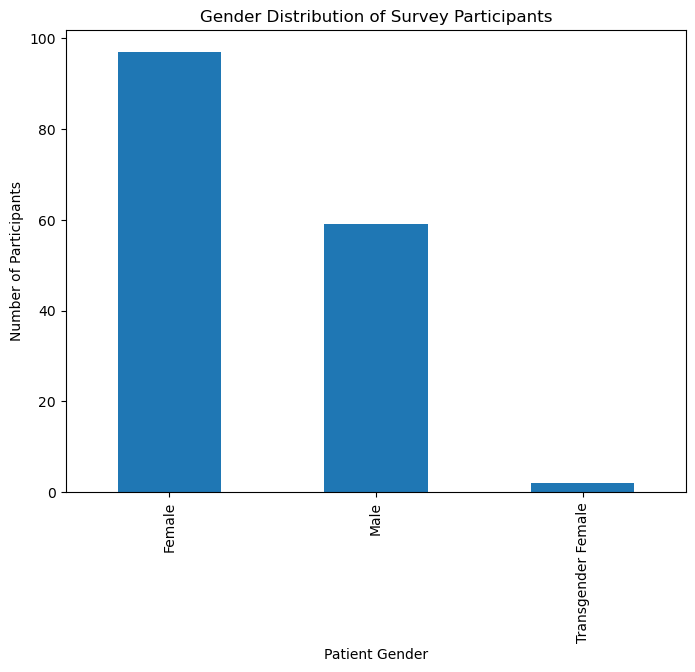

In [3]:
plt.figure(figsize=(8, 6)) 
df['Patient Gender'].value_counts().plot(kind = 'bar') 
plt.title("Gender Distribution of Survey Participants") 
plt.ylabel("Number of Participants") 

Text(0.5, 1.0, 'Age Distribution of Survey Participants')

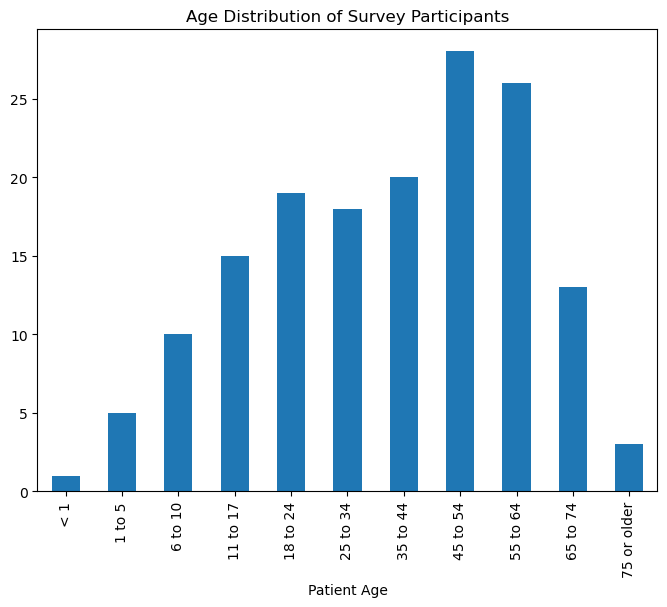

In [5]:
plt.figure(figsize=(8, 6))
age = df['Patient Age'].value_counts()

#Index(['45 to 54', '55 to 64', '35 to 44', '18 to 24', '25 to 34', '11 to 17',
# '65 to 74', '6 to 10', '1 to 5', '75 or older', '< 1'],
# dtype='object')
age[[ '< 1','1 to 5', '6 to 10', '11 to 17', '18 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 to 74', '75 or older']].plot(kind='bar')
plt.title("Age Distribution of Survey Participants")


Text(0, 0.5, 'Number of Participants')

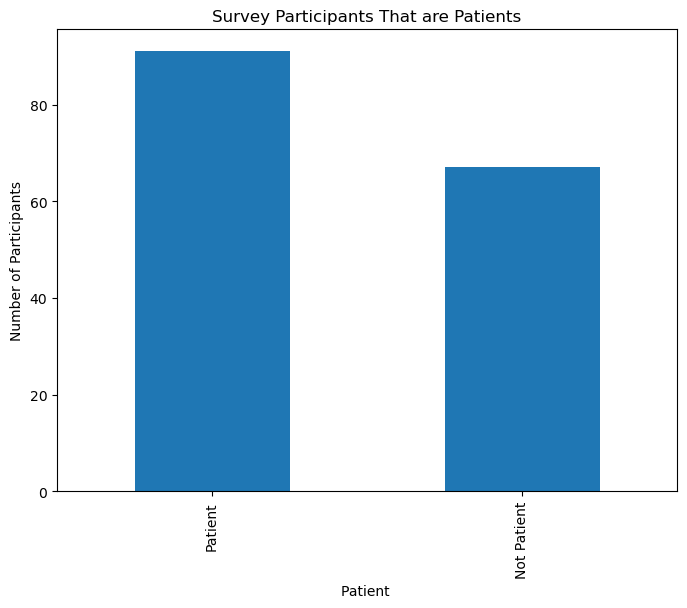

In [7]:
plt.figure(figsize=(8, 6))
patient = df['Patient '].value_counts()
patient.rename(index={'YES' : 'Patient', 'NO' : 'Not Patient'}).plot(kind='bar')
plt.title("Survey Participants That are Patients")
plt.ylabel("Number of Participants")

### 0.2 Testing

Looking at the graphs below, it seems the majority of survey respondents have received genetic
testing. Of the ones that have completed genetic testing; Geneticists, Neurologist, and Metabolic
Doctors are the categories of physicians that sent the majority of patients to be tested. An argument
could be made that primary care physicians should be sending more people with symptoms of
mitochondrial disease to be tested due to there only being 13 people being sent by a primary care,
however the primary care physicians are likely sending these participants to said specialists that
are conducting genetic testing. For the patients whom have not completed genetic testing, the top reason is due to their doctor not finding it neccessary. 

Text(0, 0.5, 'Number of Patients')

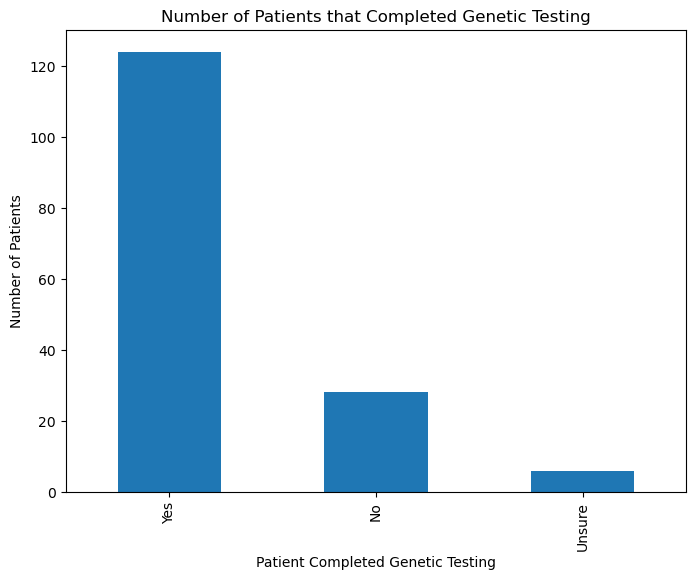

In [8]:
plt.figure(figsize=(8, 6))
df['Patient Completed Genetic Testing'].value_counts().plot(kind = 'bar')
plt.title("Number of Patients that Completed Genetic Testing")
plt.ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

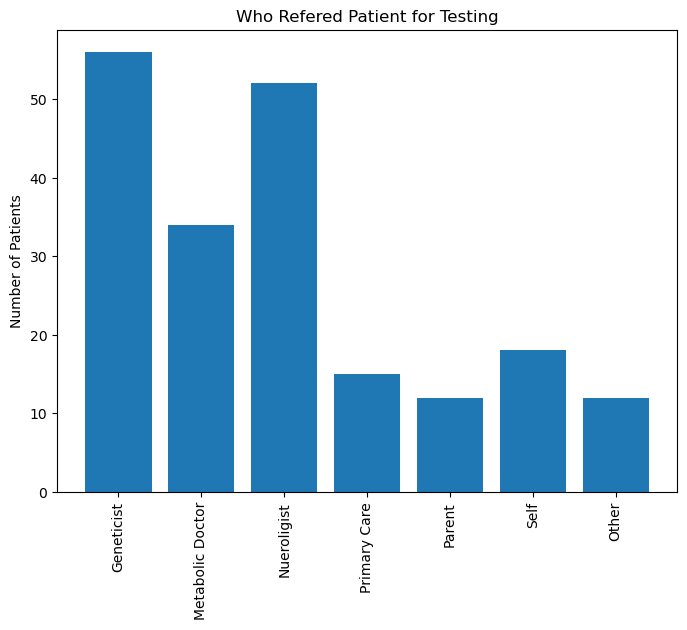

In [10]:
columns = ['Testing - Geneticist',

'Testing - Metabolic Doctor', 'Testing - Nueroligist',
'Testing - Primary Care', 'Testing - Parent', 'Testing - Self',
'Testing - Other']
testing = df[columns]
# Rename columns by removing 'Testing - ' prefix
new_columns = [col.replace('Testing - ', '') for col in columns]
# Assign new column names to the DataFrame
testing.columns = new_columns
testingCounts = pd.DataFrame(columns=new_columns)
name = []
value = []
# Iterate through columns to count 'YES'
for column in testing.columns:
    counts_yes = (testing[column] == 'YES').sum() # Count occurrences of 'YES'
    testingCounts[column] = [counts_yes]
    name.append(column)
    value.append(counts_yes)

#Visual
plt.figure(figsize=(8, 6))
plt.bar(range(len(name)), value)
plt.xticks(range(len(name)), name, rotation='vertical')
plt.title("Who Refered Patient for Testing")
plt.ylabel("Number of Patients")

Text(0, 0.5, 'Number of patients ')

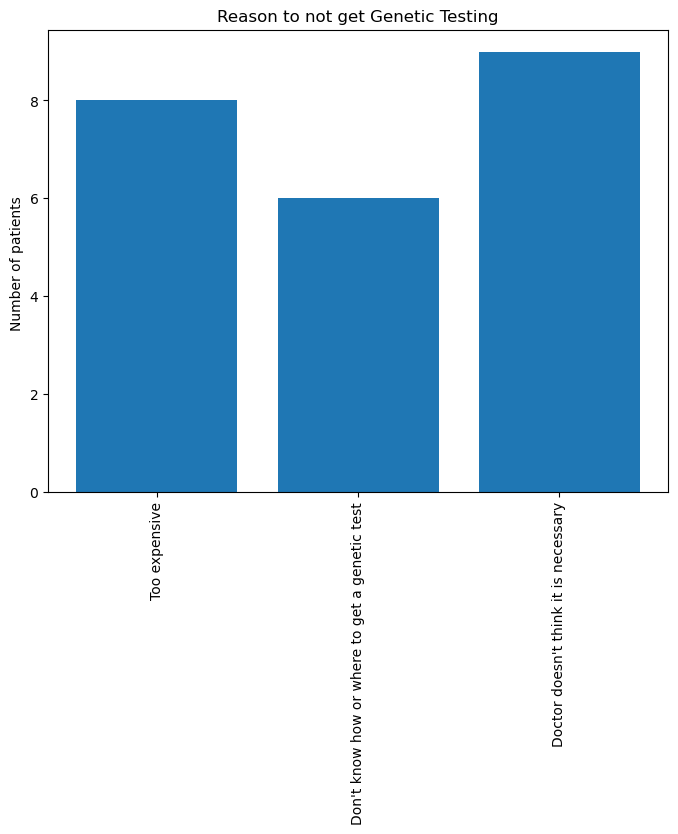

In [3]:
# Reason to not get genetic testing
name=[]
value=[]

#Itearate through cols
for column in df.iloc[:,53:56]:
    count_yes = (df[column] == "YES").sum()
    name.append(column)
    value.append(count_yes)
    
#Visualize 
plt.figure(figsize = (8,6))
plt.bar(range(len(name)),value)
plt.xticks(range(len(name)),name,rotation = 'vertical')
plt.title("Reason to not get Genetic Testing")
plt.ylabel("Number of patients ")

Text(0, 0.5, 'Number of patients ')

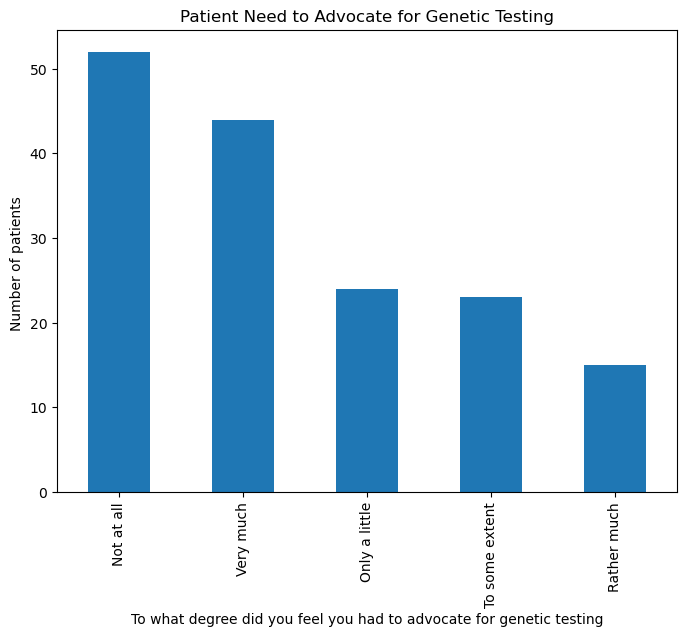

In [5]:
#Advocate
plt.figure(figsize = (8,6))
df.iloc[:,58].value_counts().plot(kind='bar')
plt.title("Patient Need to Advocate for Genetic Testing")
plt.ylabel("Number of patients ")

### 0.3 Diagnosis

Here we see the diagnosis information of the survey participants. The top diagnosis for the respondents is mitochondrial myopathy, although majority of the respondents were not initally diagnosed with mitochondrial disease. The majority of survey participants were diagnosed through clinical or genetic testing. Most survey participants were diagnosed after 6 years of symptoms, with the second most being less than a year. These two fields account for ~70% of survey responses. When the diagnosis time is aggregated by diagnosis type, an interesting result is seen. The participants that were diagnosed clinically show a roughly uniform distribution in how long it took them to be diagnosed. The participants that were diagnosed genetically, however, seem to be highly likely to be diagnosed in less than a year or longer than 6 years, different from the participants diagnosed clinically. This could possibly be due to the disease being genetic and external information being known to said participants.

Text(0, 0.5, 'Number of Patients')

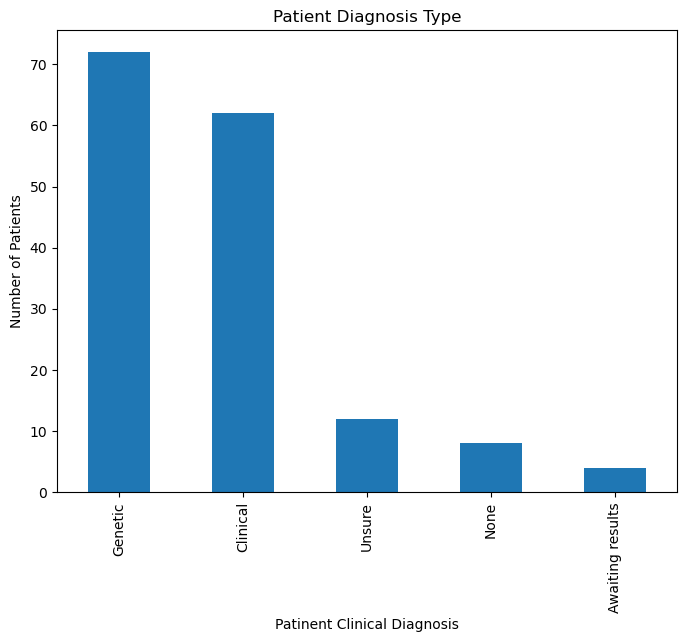

In [12]:
# Rename Df Type
df['Patinent Clinical Diagnosis'] = df['Patinent Clinical Diagnosis'].replace({'Yes - a genetic diagnosis' : 'Genetic', 'Yes - a clinical diagnosis' : 'Clinical',
'No' : 'None'})
plt.figure(figsize=(8, 6))
diagnosisType = df['Patinent Clinical Diagnosis'].value_counts().plot(kind='bar')
plt.title("Patient Diagnosis Type")
plt.ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

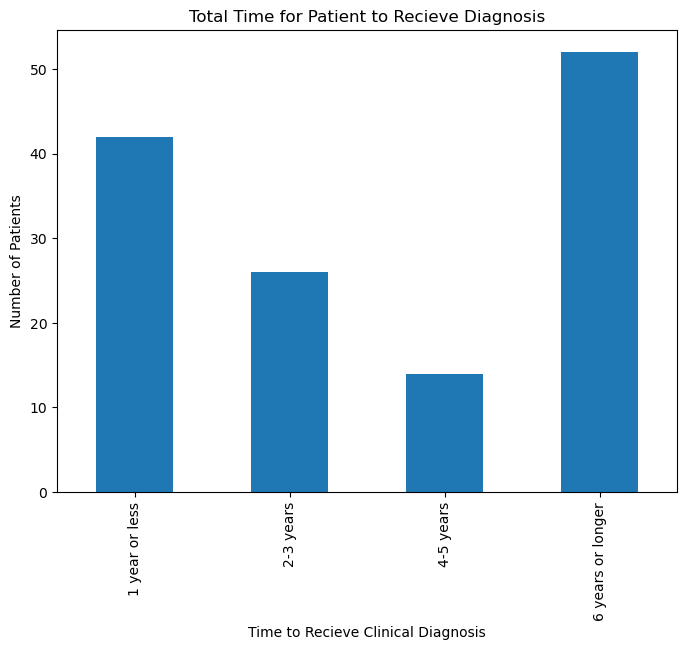

In [14]:
# Time to recieve diagnosis 
plt.figure(figsize=(8, 6))
diagnosisTime = df['Time to Recieve Clinical Diagnosis'].value_counts()
diagnosisTime[[ '1 year or less', '2-3 years', '4-5 years', '6 years or longer']].plot(kind='bar')
plt.title("Total Time for Patient to Recieve Diagnosis")
plt.ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

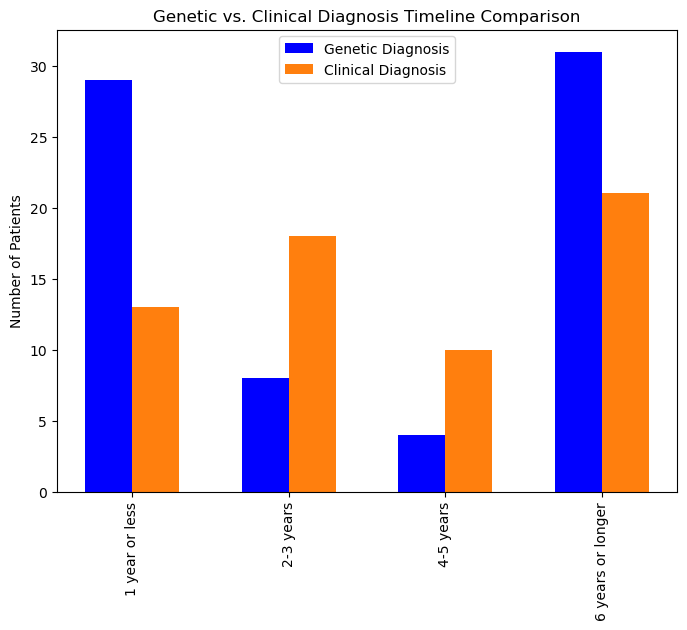

In [16]:
# Genetic vs. Clinical
mask = df['Patinent Clinical Diagnosis'].isin(['Genetic','Clinical'])
diagnosisTimeAndType = df[['Time to Recieve Clinical Diagnosis','Patinent Clinical Diagnosis']][mask]
genetic = diagnosisTimeAndType['Time to Recieve Clinical Diagnosis'][diagnosisTimeAndType['Patinent Clinical Diagnosis'].isin(['Genetic'])].value_counts()
clinical = diagnosisTimeAndType['Time to Recieve Clinical Diagnosis'][diagnosisTimeAndType['Patinent Clinical Diagnosis'].isin(['Clinical'])].value_counts()

plt.figure(figsize=(8, 6))

geneticPlot = plt.bar([0,1,2,3], genetic[['1 year or less', '2-3 years', '4-5 years', '6 years or longer']], width=.3, color = 'b', label='Genetic Diagnosis')
clinicalPlot =plt.bar([0.3,1.3,2.3,3.3], clinical[['1 year or less', '2-3 years', '4-5 years', '6 years or longer']], width=.3, color = 'tab:orange',label='Clinical Diagnosis')
plt.xticks([0.15,1.15,2.15,3.15], ['1 year or less', '2-3 years', '4-5 years','6 years or longer'], rotation='vertical')
plt.legend([geneticPlot,clinicalPlot], ["Genetic Diagnosis", "Clinical Diagnosis"])
plt.title("Genetic vs. Clinical Diagnosis Timeline Comparison")
plt.ylabel("Number of Patients")

Text(0.5, 0, 'Diagnosis')

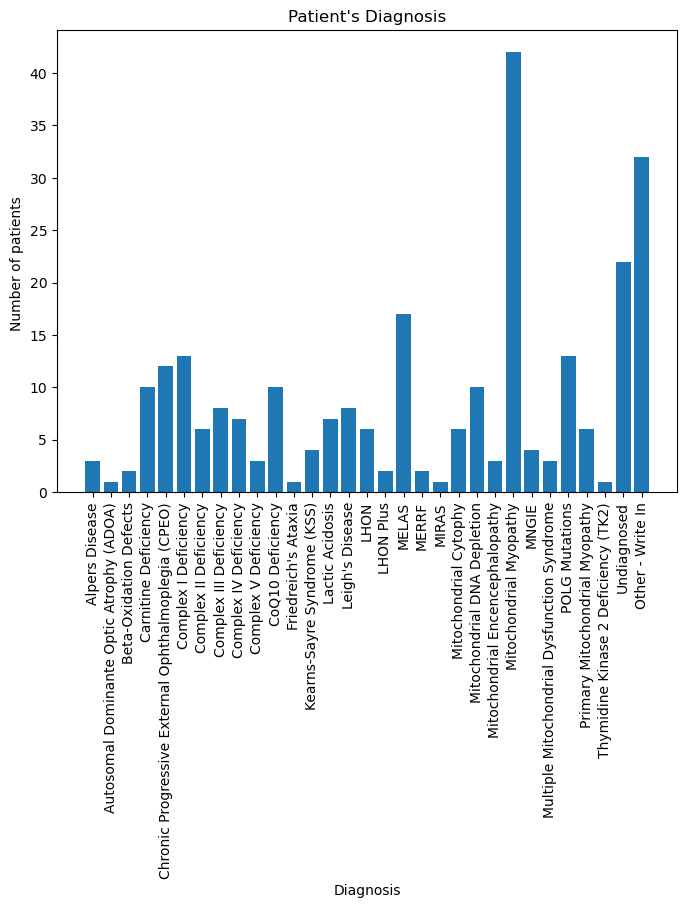

In [120]:
# Type of Diagnosis 
name=[]
value=[]

#Itearate through cols
for column in df.iloc[:,20:51]:
    count_yes = (df[column] == "YES").sum()
    name.append(column)
    value.append(count_yes)
    
#Visualize 
plt.figure(figsize = (8,6))
plt.bar(range(len(name)),value)
plt.xticks(range(len(name)),name,rotation = 'vertical')
plt.title("Patient's Diagnosis")
plt.ylabel("Number of patients ")
plt.xlabel("Diagnosis")

Text(0, 0.5, 'Number of patients ')

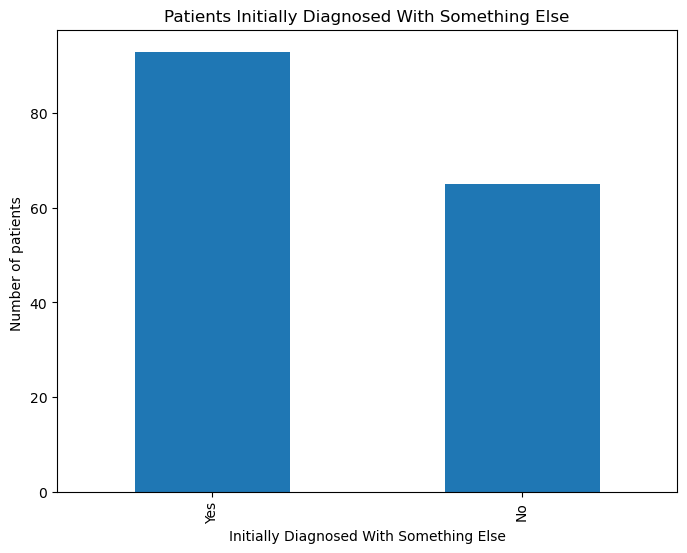

In [10]:
# Initially Diagnosed With Something Else
plt.figure(figsize = (8,6))
df.iloc[:,51].value_counts().plot(kind='bar')
plt.title("Patients Initially Diagnosed With Something Else")
plt.ylabel("Number of patients ")

Text(0, 0.5, 'Number of patients ')

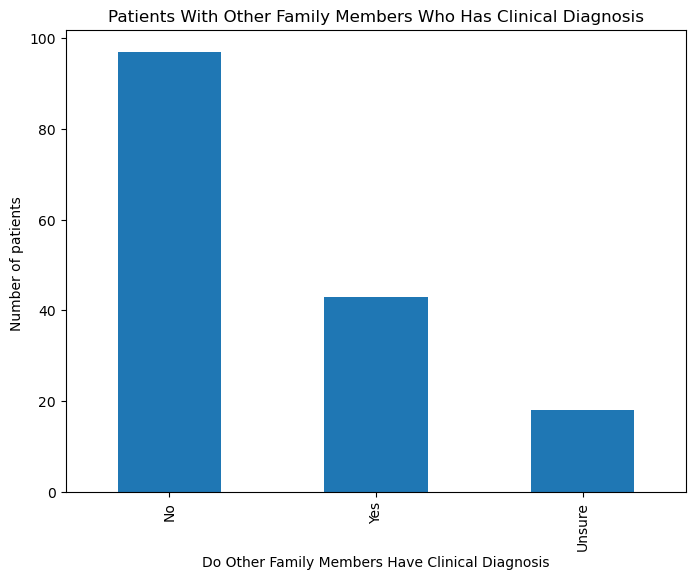

In [4]:
# Other Family 
#Visualize 
plt.figure(figsize = (8,6))
df.iloc[:,57].value_counts().plot(kind='bar')
plt.title("Patients With Other Family Members Who Has Clinical Diagnosis")
plt.ylabel("Number of patients ")

### 04. Clinical Trials 

The graphs below summarize and visualize the patients feelings towards clinical trials. 
- The top 3 reasons patients are willing to participate involve option for treatment, access to new treatments, and the potential to help others with mitochondrial disease. 
- The top 3 reasons respondents do not participate in clinical trials include fear of adverse reaction or death, not being aware of trials, and having to travel for clinical trials. 
- The top 2 ways patients hear of medical trials are through their physician and through advocacy groups. 

Text(0, 0.5, 'Number of patients ')

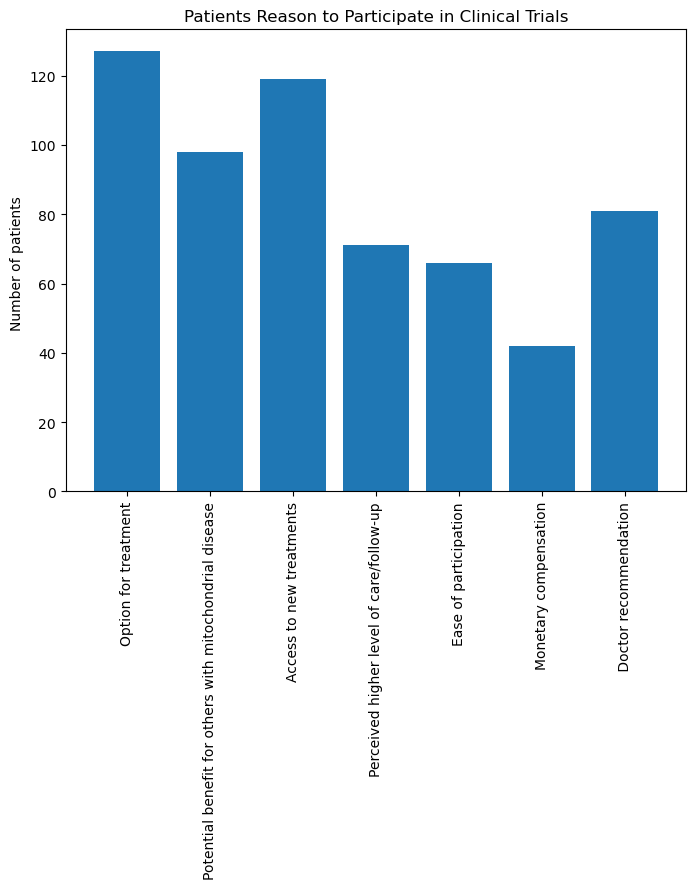

In [108]:
# TO participat in trials
name=[]
value=[]

#Itearate through cols
for column in df.iloc[:,59:66]:
    count_yes = (df[column] == "YES").sum()
    name.append(column)
    value.append(count_yes)
    
#Visualize 
plt.figure(figsize = (8,6))
plt.bar(range(len(name)),value)
plt.xticks([0,1,2,3,4,5,6],['Option for treatment','Potential benefit for others with mitochondrial disease','Access to new treatments','Perceived higher level of care/follow-up','Ease of participation','Monetary compensation',' Doctor recommendation'],rotation = 'vertical')
plt.title("Patients Reason to Participate in Clinical Trials")
plt.ylabel("Number of patients ")

Text(0, 0.5, 'Number of patients ')

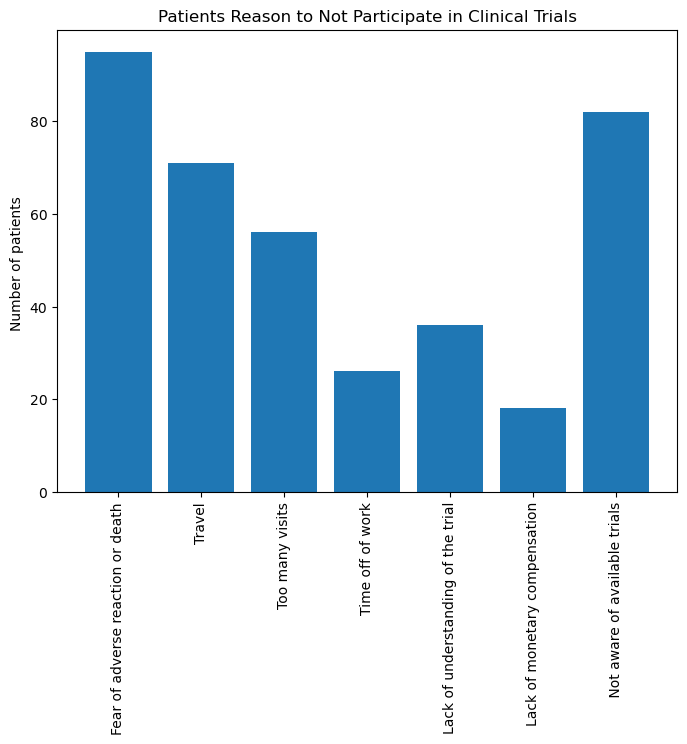

In [106]:
# NOT participat in trials
name=[]
value=[]

#Itearate through cols
for column in df.iloc[:,66:73]:
    count_yes = (df[column] == "YES").sum()
    name.append(column)
    value.append(count_yes)
    
#Visualize 
plt.figure(figsize = (8,6))
plt.bar(range(len(name)),value)
plt.xticks([0,1,2,3,4,5,6],['Fear of adverse reaction or death','Travel','Too many visits','Time off of work','Lack of understanding of the trial','Lack of monetary compensation',' Not aware of available trials'],rotation = 'vertical')
plt.title("Patients Reason to Not Participate in Clinical Trials")
plt.ylabel("Number of patients ")

Text(0, 0.5, 'Number of patients ')

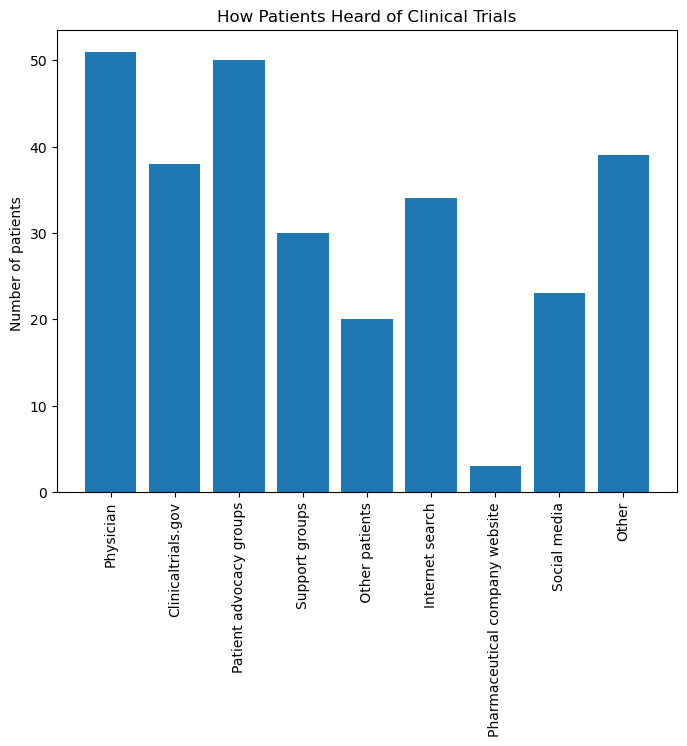

In [104]:
# Learn of trials 
name=[]
value=[]

#Itearate through cols
for column in df.iloc[:,73:82]:
    count_yes = (df[column] == "YES").sum()
    name.append(column)
    value.append(count_yes)
    
#Visualize 
plt.figure(figsize = (8,6))
plt.bar(range(len(name)),value)
plt.xticks([0,1,2,3,4,5,6,7,8],['Physician','Clinicaltrials.gov','Patient advocacy groups','Support groups',' Other patients','Internet search','Pharmaceutical company website','Social media','Other'],rotation = 'vertical')
plt.title("How Patients Heard of Clinical Trials")
plt.ylabel("Number of patients ")

### 0.5 Patients' Beliefs

Looking at the graphs below, it seems that majority of the survey respondents' relationships have been negativley affected from mitochondrial disease. To support the patients, the top three topics the survey respondents' would appreciate more research on includes fatigue, weakness, and diagnosis. 

Text(0, 0.5, 'Number of patients ')

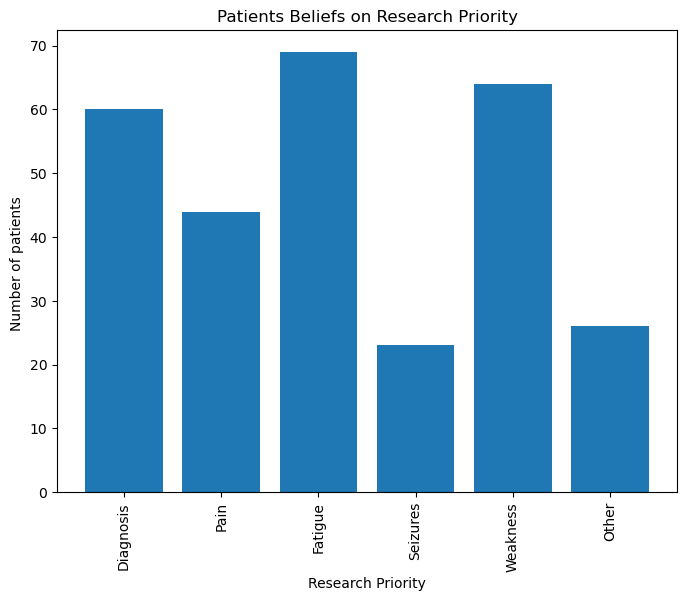

In [102]:
#Research Priority 
name=[]
value=[]

#Itearate through cols
for column in df.iloc[:,82:88]:
    count_yes = (df[column] == "YES").sum()
    name.append(column)
    value.append(count_yes)
    
#Visualize 
plt.figure(figsize = (8,6))
plt.bar(range(len(name)),value)
plt.xlabel("Research Priority")
plt.xticks(range(len(name)),name,rotation = 'vertical') 
plt.title("Patients Beliefs on Research Priority")
plt.ylabel("Number of patients ")

Text(0.5, 0, 'Impact')

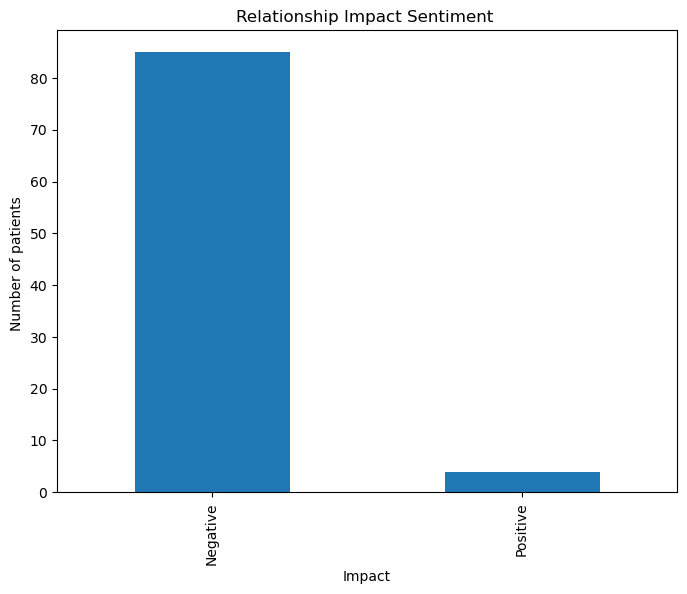

In [90]:
# Relationship Impact Sentiment 
plt.figure(figsize = (8,6))
nlp_df.iloc[:,8].value_counts().plot(kind='bar')
plt.xticks([0, 1],['Negative', 'Positive']) # Change xticks labels 
plt.title("Relationship Impact Sentiment ")
plt.ylabel("Number of patients ")
plt.xlabel('Impact')

### 0.6 WordClouds

The wordclouds below represents the written responses to the these questions: 

1. What was the patient initially diagnosed with?
- The wordclouds found that the top entered inital diagnosis includes fibromyalgia, chronic fatiuge, and myasthenia gravis. 
2. What questions to ask a mitochondrial disease expert?
- The wordclouds found that the top entered questions invlove topics about treatment, symptoms, and diagnosis. 


In [11]:
## WORDCLOUDS 
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

In [12]:
#Lowercase
df['Initial Diagnosis']  = df['Initial Diagnosis'].str.lower()

In [13]:
# Remove unusual characters 
df['Initial Diagnosis']  = df['Initial Diagnosis'] .str.replace(r'[^a-zA-Z0-9\s]',"",regex=True)

In [14]:
#Remove NAN values 
col = df['Initial Diagnosis'].dropna()

In [15]:
col

0                                multisystem involvement
1      chronic fatigue syndrome and irritable bowel s...
2                                               lymemold
3                                           fibromyalgia
6                                  ibs failure to thrive
                             ...                        
153    several things some were symptoms of greater d...
154                                        dont remember
155        various  bipolar focal epilepsy ptosis asthma
156                     hearing loss learning disability
157                                         fibromyalgia
Name: Initial Diagnosis, Length: 95, dtype: object

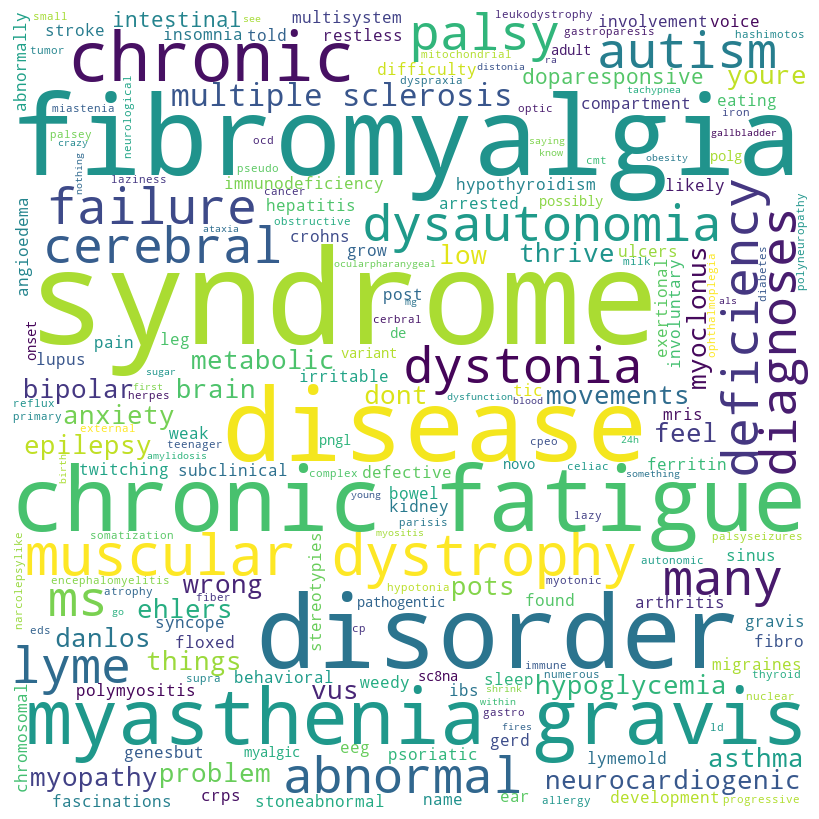

In [16]:
words = ''
stopwords = set(STOPWORDS)
for val in col:
    val = str(val)
    tokens = val.split()
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [17]:
nlp_df = pd.read_csv('NLP.csv')

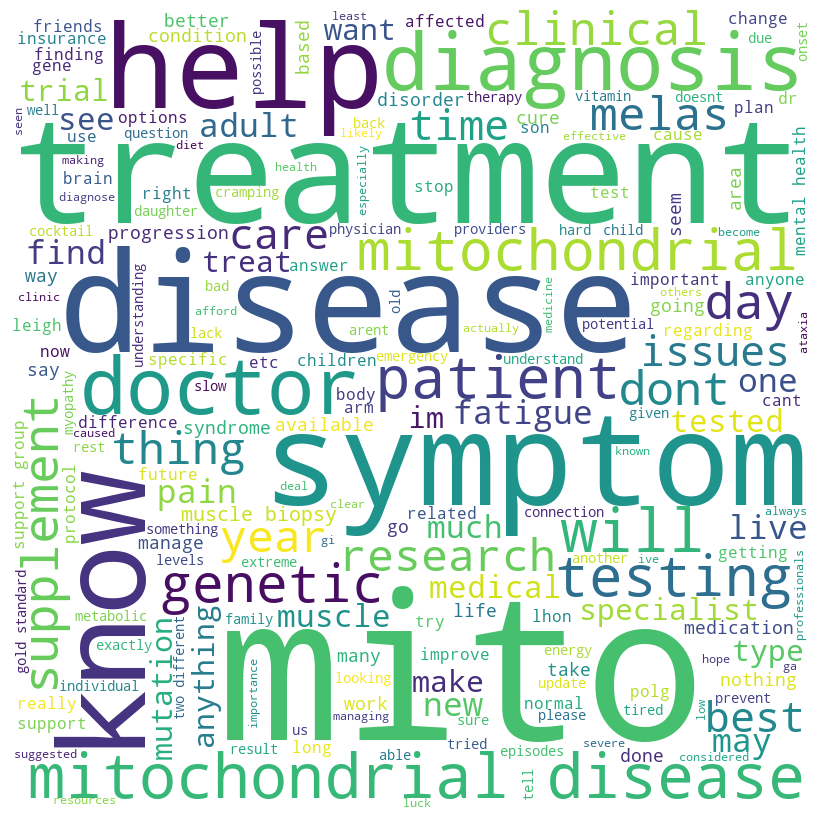

In [46]:
# What questions to ask a mitochondrial disease expert?

#Prep 
col = nlp_df['What questions to ask a mitochondrial disease expert?']
col = col.str.lower() #Make all lowercase 
col = col.str.replace(r'[^a-zA-Z0-9\s]',"",regex=True) # Remove unusual characters
col = col.dropna() #Remove NAN values

# Make word cloud 
words = ''
stopwords = set(STOPWORDS)
for val in col:
    val = str(val)
    tokens = val.split()
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()